In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from glob import glob

import cv2
import os

In [2]:
!pwd

/home/heye0507/zhangyu_project


In [2]:
path = Path('/home/heye0507/zhangyu_project')
data = Path(path/'data')

In [14]:
!ls {data}/frames/34

34_out00001.png  34_out00031.png  34_out00061.png  34_out00091.png
34_out00002.png  34_out00032.png  34_out00062.png  34_out00092.png
34_out00003.png  34_out00033.png  34_out00063.png  34_out00093.png
34_out00004.png  34_out00034.png  34_out00064.png  34_out00094.png
34_out00005.png  34_out00035.png  34_out00065.png  34_out00095.png
34_out00006.png  34_out00036.png  34_out00066.png  34_out00096.png
34_out00007.png  34_out00037.png  34_out00067.png  34_out00097.png
34_out00008.png  34_out00038.png  34_out00068.png  34_out00098.png
34_out00009.png  34_out00039.png  34_out00069.png  34_out00099.png
34_out00010.png  34_out00040.png  34_out00070.png  34_out00100.png
34_out00011.png  34_out00041.png  34_out00071.png  34_out00101.png
34_out00012.png  34_out00042.png  34_out00072.png  34_out00102.png
34_out00013.png  34_out00043.png  34_out00073.png  34_out00103.png
34_out00014.png  34_out00044.png  34_out00074.png  34_out00104.png
34_out00015.png  34_out00045.png  34_out00075.png  34_out00105

In [3]:
camera_33_files = Path(data/'frames/33')
camera_34_files = Path(data/'frames/34')
camera_35_files = Path(data/'frames/35') 

In [4]:
def get_files_in_dir(path,extensions=None):
    fs = [o.name for o in os.scandir(path) if o.is_file()]
    res = [path/f for f in fs if not f.startswith('.') and ((not extensions) or f'{f.split(".")[-1].lower()}' in extensions)]
    return res

In [5]:
camera_33_fpaths = get_files_in_dir(camera_33_files)
camera_34_fpaths = get_files_in_dir(camera_34_files)
camera_35_fpaths = get_files_in_dir(camera_35_files)

In [6]:
camera_33_fpaths = sorted(camera_33_fpaths,key=lambda i: os.path.splitext(os.path.basename(i))[0])
camera_34_fpaths = sorted(camera_34_fpaths,key=lambda i: os.path.splitext(os.path.basename(i))[0])
camera_35_fpaths = sorted(camera_35_fpaths,key=lambda i: os.path.splitext(os.path.basename(i))[0])

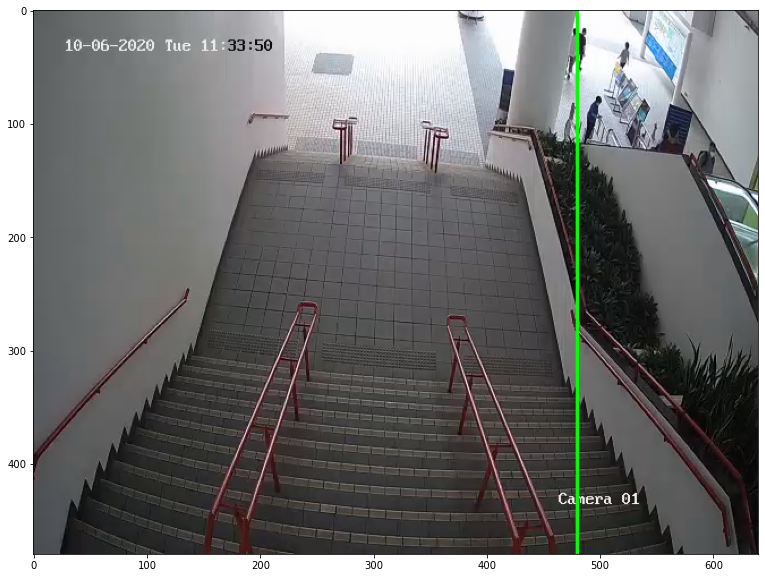

In [59]:
c33_img = cv2.imread(str(camera_33_fpaths[0]),cv2.IMREAD_COLOR)
c33_img = cv2.cvtColor(c33_img,cv2.COLOR_BGR2RGB).astype(np.float32)
_, ax = plt.subplots(1,1,figsize=(16,10))
c33_img /= 255.
c33_img = cv2.line(c33_img,(480,0),(480,480),(0,1,0),2)
ax.imshow(c33_img)

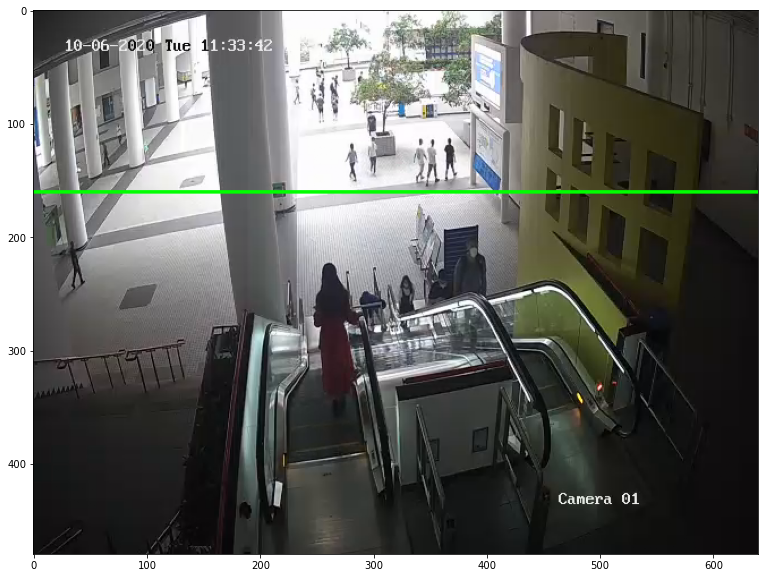

In [64]:
c34_img = cv2.imread(str(camera_34_fpaths[0]),cv2.IMREAD_COLOR)
c34_img = cv2.cvtColor(c34_img,cv2.COLOR_BGR2RGB).astype(np.float32)
_, ax = plt.subplots(1,1,figsize=(16,10))
c34_img /= 255.
c34_img = cv2.line(c34_img,(0,160),(640,160),(0,1,0),2)
ax.imshow(c34_img)

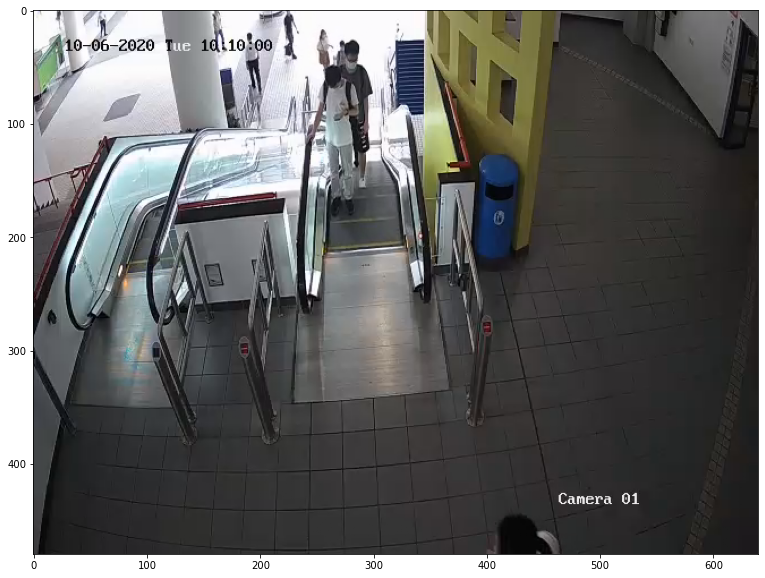

In [65]:
c35_img = cv2.imread(str(camera_35_fpaths[0]),cv2.IMREAD_COLOR)
c35_img = cv2.cvtColor(c35_img,cv2.COLOR_BGR2RGB).astype(np.float32)
_, ax = plt.subplots(1,1,figsize=(16,10))
c35_img /= 255.
#c35_img = cv2.line(c35_img,(0,160),(640,160),(0,1,0),2)
ax.imshow(c35_img)

# Test yolov5

In [7]:
import sys

In [8]:
sys.path.insert(0,'/home/heye0507/yolov5/')

In [9]:
from utils.datasets import *
from utils.torch_utils import *
from utils.google_utils import gdrive_download

In [7]:
!python /home/heye0507/yolov5/detect.py --weights yolov5x.pt --img 640 --conf 0.3 --classes 0 --save-txt --source /home/heye0507/zhangyu_project/data/frames/33

Namespace(agnostic_nms=False, augment=False, classes=[0], conf_thres=0.3, device='', img_size=640, iou_thres=0.45, output='inference/output', save_conf=False, save_txt=True, source='/home/heye0507/zhangyu_project/data/frames/33', update=False, view_img=False, weights=['yolov5x.pt'])
Using CPU

Fusing layers... 
Model Summary: 284 layers, 8.89222e+07 parameters, 0 gradients
image 1/120 /home/heye0507/zhangyu_project/data/frames/33/33_out00001.png: 480x640 4 persons, Done. (2.896s)
image 2/120 /home/heye0507/zhangyu_project/data/frames/33/33_out00002.png: 480x640 5 persons, Done. (2.920s)
image 3/120 /home/heye0507/zhangyu_project/data/frames/33/33_out00003.png: 480x640 4 persons, Done. (2.913s)
image 4/120 /home/heye0507/zhangyu_project/data/frames/33/33_out00004.png: 480x640 3 persons, Done. (2.924s)
image 5/120 /home/heye0507/zhangyu_project/data/frames/33/33_out00005.png: 480x640 4 persons, Done. (2.939s)
image 6/120 /home/heye0507/zhangyu_project/data/frames/33/33_out00006.png: 480x

# Demo Result

In [27]:
xc,yc,w,h = 0.396094,0.180208,0.0140625,0.05625
xc,yc,w,h = xc*640,yc*480,w*640,h*480
x1,y1,x2,y2 = (xc-w/2),(yc-h/2),(xc+w/2),(yc+h/2)
x1,y1,x2,y2

(249.00016, 72.99984, 258.00016, 99.99984)

In [11]:
round(x)

254

In [35]:
path

PosixPath('/home/heye0507/zhangyu_project')

In [10]:
pred_files = get_files_in_dir(path/'result/34_demo_output',extensions=['png'])
pred_files = sorted(pred_files,key=lambda i: os.path.splitext(os.path.basename(i))[0])
pred_files[:10]

[PosixPath('/home/heye0507/zhangyu_project/result/34_demo_output/34_out00001.png'),
 PosixPath('/home/heye0507/zhangyu_project/result/34_demo_output/34_out00002.png'),
 PosixPath('/home/heye0507/zhangyu_project/result/34_demo_output/34_out00003.png'),
 PosixPath('/home/heye0507/zhangyu_project/result/34_demo_output/34_out00004.png'),
 PosixPath('/home/heye0507/zhangyu_project/result/34_demo_output/34_out00005.png'),
 PosixPath('/home/heye0507/zhangyu_project/result/34_demo_output/34_out00006.png'),
 PosixPath('/home/heye0507/zhangyu_project/result/34_demo_output/34_out00007.png'),
 PosixPath('/home/heye0507/zhangyu_project/result/34_demo_output/34_out00008.png'),
 PosixPath('/home/heye0507/zhangyu_project/result/34_demo_output/34_out00009.png'),
 PosixPath('/home/heye0507/zhangyu_project/result/34_demo_output/34_out00010.png')]

# TODO:
1. check img_file, then check if txt file exsits
2. check txt file, restore img size and get rid of "not count" region
3. count numbers and return

In [11]:
test_file = str(pred_files[0]).split('.')[0]+'.txt'

In [21]:
def has_box(fname):
    return os.path.exists(str(fname).split('.')[0]+'.txt')

def coco2pascal(box,img_size):
    
    '''
        box is a list with coco format (xc,yc,w,h)
        img_size is a tuple with w,h
    '''
    xc,yc,w,h = box[0]*img_size[0],box[1]*img_size[1],box[2]*img_size[0],box[3]*img_size[1]
    x1 = xc-w/2
    y1 = yc-h/2
    x2 = xc+w/2
    y2 = yc+h/2
    return [x1,y1,x2,y2]

def keepbox_camera34(box,ykeep=160):
    '''
        box is a list with pascal format (xyxy)
    '''
    return box[-1] > ykeep

def keepbox_camera33(box,xkeep=480):
    return box[2] < xkeep
    

In [50]:
def process_output(fpaths,cam_pos,img_size=(640,480)):
    '''
        fpaths:    list of .png files 
                   pred_box should be in the same folder with .png files
        cam_pos:   33 or 34 for blocked out region
        img_size:  original img_size
        
        return filtered box, all box, no box detected file and count
    '''
    res, all_boxes, no_detect_files, count = [],[],[],[]
    for file in fpaths:
        if not has_box(file):
            no_detect_files.append(file)
            count.append(0)
            continue
        file = str(file).split('.')[0]+'.txt'
        with open(file,'r') as fp:
            result = []
            boxes = []
            lines = [l.rstrip() for l in fp]
            for line in lines:
                box = [float(x) for x in line.split(' ')][1:]
                box = coco2pascal(box,img_size)
                if cam_pos == 34 and keepbox_camera34(box):
                    result.append(box)
                elif cam_pos == 33 and keepbox_camera33(box):
                    result.append(box)
                elif cam_pos ==35:
                    result.append(box)
                boxes.append(box)
            count.append(len(result))
            res.append(result)
            all_boxes.append(boxes)
    return res,all_boxes,no_detect_files,count

In [51]:
res,all_boxes,no_detect_files,count = process_output(pred_files,34)

In [43]:
res = []
all_boxes = []
no_detect_files = []
count = []
for file in pred_files:
    if not has_box(file):
        no_detect_files.append(file)
        count.append(0)
        continue #count += 0
    file = str(file).split('.')[0]+'.txt'
    with open(file,'r') as fp:
        result = []
        boxes = []
        lines = [l.rstrip() for l in fp]
        for line in lines:
            box = [float(x) for x in line.split(' ')][1:]
            box = coco2pascal(box,(640,480))
            if keepbox_camera34(box):
                result.append(box)
            boxes.append(box)
        count.append(len(result))
        res.append(result)
        all_boxes.append(boxes)
        

In [39]:
res[1]

[[247.00032, 220.99992, 287.00032, 340.00008],
 [378.0, 191.00016, 410.0, 260.00016]]

In [40]:
all_boxes[1]

[[250.0, 72.000168, 258.0, 100.00015199999999],
 [360.0, 108.0, 372.0, 147.0],
 [299.0, 119.999832, 309.0, 154.99984800000001],
 [266.00016, 112.999992, 277.00016, 145.000008],
 [247.00032, 220.99992, 287.00032, 340.00008],
 [349.0, 107.00016, 363.0, 146.00016],
 [376.00016, 106.99999199999999, 387.00016, 145.000008],
 [378.0, 191.00016, 410.0, 260.00016]]

In [63]:
def show_result(fpaths,idx,all_box,res_box):
    img = cv2.imread(str(fpaths[idx]),cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB).astype(np.float32)
    _, ax = plt.subplots(1,2,figsize=(16,10))
    img /= 255.
    #cv2.line(c34_img,(0,160),(640,160),(0,1,0),2)
    for box in all_box:
        cv2.rectangle(img,(round(box[0]),round(box[1])),(round(box[2]),round(box[3])),(0,1,0),2)
    ax[0].imshow(img)

    img = cv2.imread(str(fpaths[idx]),cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB).astype(np.float32)
    img /= 255.
    for box in res_box:
        cv2.rectangle(img,(round(box[0]),round(box[1])),(round(box[2]),round(box[3])),(0,0,1),2)
    ax[1].imshow(img)

In [73]:
idx = 103
all_box = all_boxes[idx]
res_box = res[idx]

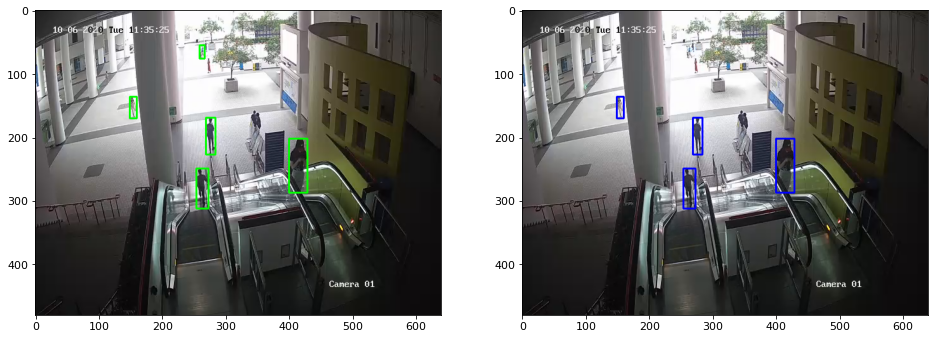

In [74]:
show_result(camera_34_fpaths,idx,all_box,res_box)

In [76]:
len(np.linspace(1,120,num=120))

120

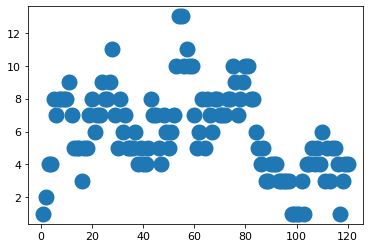

In [79]:
plt.scatter(np.linspace(1,120,num=120),count,linewidths=10)

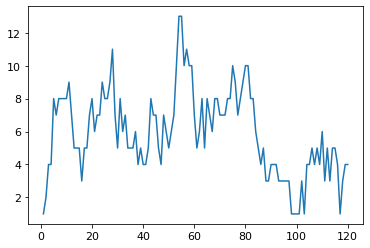

In [80]:
plt.plot(np.linspace(1,120,num=120),count)

In [199]:
gt_count = [11,8,9,9,9,9,8,8,8,8,8,7,7,7,4,4,5,5,7,7,8,8,9,8,9,9,9,10,9,7,7,7,7,7,8,8,9,9,8,8,8,8,8,8,8,8,8,8,9,9,10,10,11,12,14,14,13,13,13,12,11,11,10,10,10,10,10,10,10,10,10,8,8,8,8,9,9,9,8,9,9,8,8,9,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,6,6,6,7,7,6,6,6,5,5,4,4,4,5]

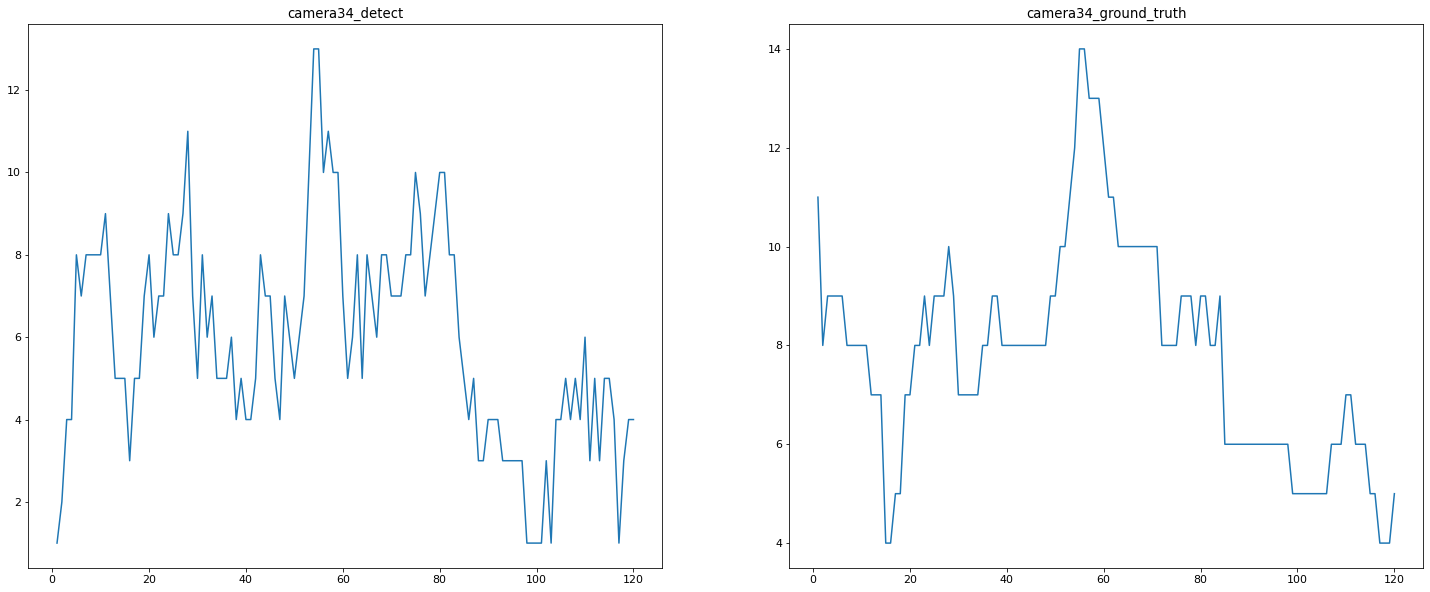

In [210]:
_,ax = plt.subplots(1,2,figsize=(25,10))
ax[0].title.set_text('camera34_detect')
ax[0].plot(np.linspace(1,120,num=120),count)
ax[1].title.set_text('camera34_ground_truth')
ax[1].plot(np.linspace(1,120,num=120),gt_count)

In [200]:
len(gt_count)

120

In [91]:
count[:15]

[1, 2, 4, 4, 8, 7, 8, 8, 8, 8, 9, 7, 5, 5, 5]

In [90]:
gt_count

[11, 8, 9, 9, 9, 9, 8, 8, 8, 8, 8, 7, 7, 7, 4]